In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from os import path
from scipy.signal import resample
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
mpl.style.use('seaborn-notebook')
%matplotlib inline
#sorted(mpl.style.available)


#adding local modules
import sys
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio
from utils import load_biodarw

# setting up variables
doc_path = "/data/elekin/doc"
coefficients=17
et = "T001"
ct ="C01"

%matplotlib inline

In [5]:
metadf=pd.read_csv(path.join("/data/elekin/doc","metadata-202208-v1.csv"),index_col=0)
#metadf.head(16)

In [6]:
dataset=load_biodarw(metadf.index, metadf['abs_path'])
dataset.head(1)

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,3880,5330,1368624260328,1,120,590,1229,C107_2


In [7]:
def local_radio(x, y):  
    """np.sqrt((L['x']-L['x'][0])**2 + (L['y']-L['y'][0])**2)"""
    
    #return np.sqrt((x)**2 + (y)**2)
    return np.sqrt((x-x[0])**2 + (y-y[0])**2)

def local_extract_radio(L, n=None):
    """

    :param L:
    :param n:
    :return:
    """
    x = L['x'].values if n is None else resample(L['x'].values, n)
    y = L['y'].values if n is None else resample(L['y'].values, n)
    return local_radio(x, y)

<AxesSubplot:>

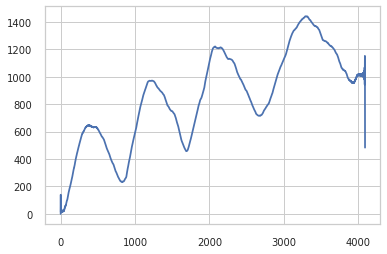

In [8]:
r = dataset.groupby('subject_id').apply(local_extract_radio, n=4096)
r_df = pd.DataFrame(r.tolist(), index=r.index)
r_df.loc['C01_1'].plot()

<AxesSubplot:>

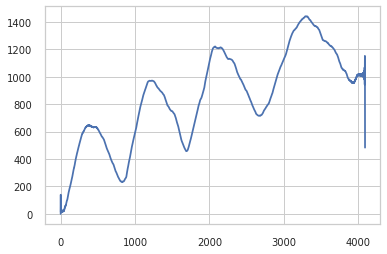

In [9]:
r = dataset.groupby('subject_id').apply(extract_radio, n=4096)
r_df = pd.DataFrame(r.tolist(), index=r.index)
r_df.loc['C01_1'].plot()

<AxesSubplot:>

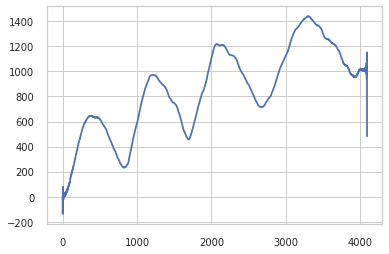

In [11]:
r = dataset.groupby('subject_id').apply(extract_radio).apply(resample,num=4096)
r_df = pd.DataFrame(r.tolist(), index=r.index)
r_df.loc['C01_1'].plot()

Loading labels based on clinic, residues and features from residues.


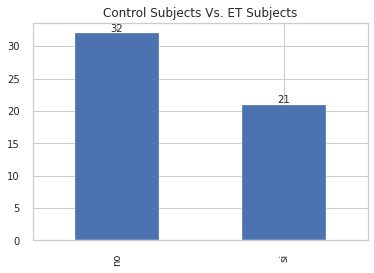

In [12]:
y = metadf['temblor']
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects', x='counts')
_ = ax.bar_label(ax.containers[0])

In [13]:
dataset[dataset['subject_id']=='C01_1']

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,5310,3728,1845198,1,3280,810,238,C01_1
1,5311,3726,1845206,1,3280,810,320,C01_1
2,5311,3726,1845213,1,3280,810,302,C01_1
3,5312,3725,1845221,1,3280,810,260,C01_1
4,5313,3725,1845228,1,3280,810,244,C01_1
...,...,...,...,...,...,...,...,...
1975,5404,4739,1860065,1,3470,730,737,C01_1
1976,5404,4739,1860072,0,3470,730,0,C01_1
1977,5404,4742,1860080,0,3460,740,0,C01_1
1978,5405,4740,1860087,0,3460,740,0,C01_1


In [139]:
sample.loc['C08']

0       6358.574054
1       6363.736324
2       6366.318010
3       6369.760828
4       6372.852187
           ...     
2990    9905.211255
2991    9899.362656
2992    9891.845227
2993    9885.165148
2994    9880.991094
Length: 2995, dtype: float64

In [215]:
rd = dataset.groupby('subject_id').apply(extract_residues, c=coefficients).apply(resample, num=4096)
rd_df = pd.DataFrame(rd.tolist(), index=rd.index)

In [164]:
r_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,6691,6692,6693,6694,6695,6696,6697,6698,6699,6700
subject_id,,,,,,,,,,,,,,,,,,,,,
T023_2,0.0,0.000000,10.000000,14.142136,22.360680,31.622777,41.231056,430.116263,900.055554,1370.036496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C102_2,0.0,0.000000,510.000000,4085.859151,4074.682810,4052.330194,4013.001994,3953.918689,3914.836650,3879.277897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01_1,0.0,2.236068,2.236068,3.605551,4.242641,6.403124,8.062258,9.848858,10.770330,11.704700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C104_2,0.0,0.000000,3095.561338,3098.122173,3098.122173,3099.152303,3099.667724,3099.667724,3099.326701,3098.470106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T028_2,0.0,0.000000,10.000000,1843.610588,1843.341802,1848.097400,1858.564231,1877.610449,1912.241094,1933.248561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T010,0.0,30.000000,50.990195,60.827625,70.710678,0.000000,0.000000,80.622577,90.553851,90.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T015,0.0,0.000000,1.000000,2.000000,3.000000,3.162278,5.099020,5.385165,6.708204,9.433981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T018,0.0,5.000000,8.000000,10.000000,12.000000,13.000000,14.000000,14.000000,14.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C07_2,0.0,20.000000,41.303753,69.720872,3512.377685,3512.377685,3512.421672,3509.424597,3501.432421,3490.443238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

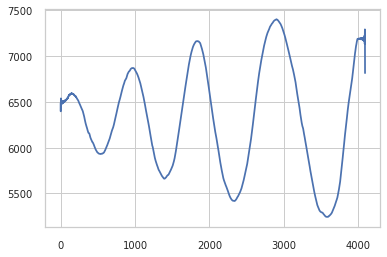

In [217]:
r_df.loc['C01_1'].plot()

In [118]:
r_df.loc['C03_1']

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6696    NaN
6697    NaN
6698    NaN
6699    NaN
6700    NaN
Name: C03_1, Length: 6701, dtype: float64

Verify that the data calculated with airflow is correct

In [6]:
#this data has been previously processed by airflow
features = pd.read_csv("/data/elekin/data/results/handwriting/tmp/residues_17_20220827.csv")
features = features.set_index(features.columns[0]).T
print("Loaded data from CSV")
features.sample(5)

Loaded data from CSV


Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
C01_1,7.349452e-15,-13.29194,1.024601,10.161138,3.315941,-3.097414,1.440666,7.129718,4.707049,0.572884,...,97.4489,95.955542,101.818591,104.332167,95.874072,89.940103,101.853141,116.80026,101.116099,49.724857


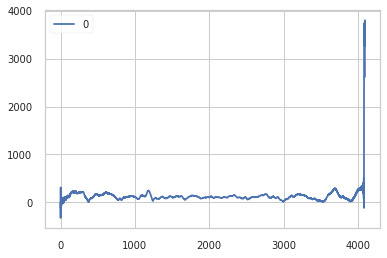

In [7]:
_=pd.DataFrame(resample(extract_residues(dataset[ dataset['subject_id'] == 'C08' ][['x', 'y']], c=coefficients), 4096)).plot()

<AxesSubplot:xlabel='Unnamed: 0'>

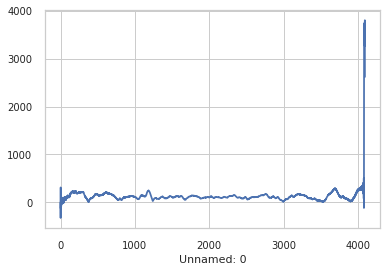

In [8]:
features.loc['C08'].plot()

In [9]:
rd_rd.shape, features.shape

((53, 4096), (53, 4096))

## Residues Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

0.0026024975547121352

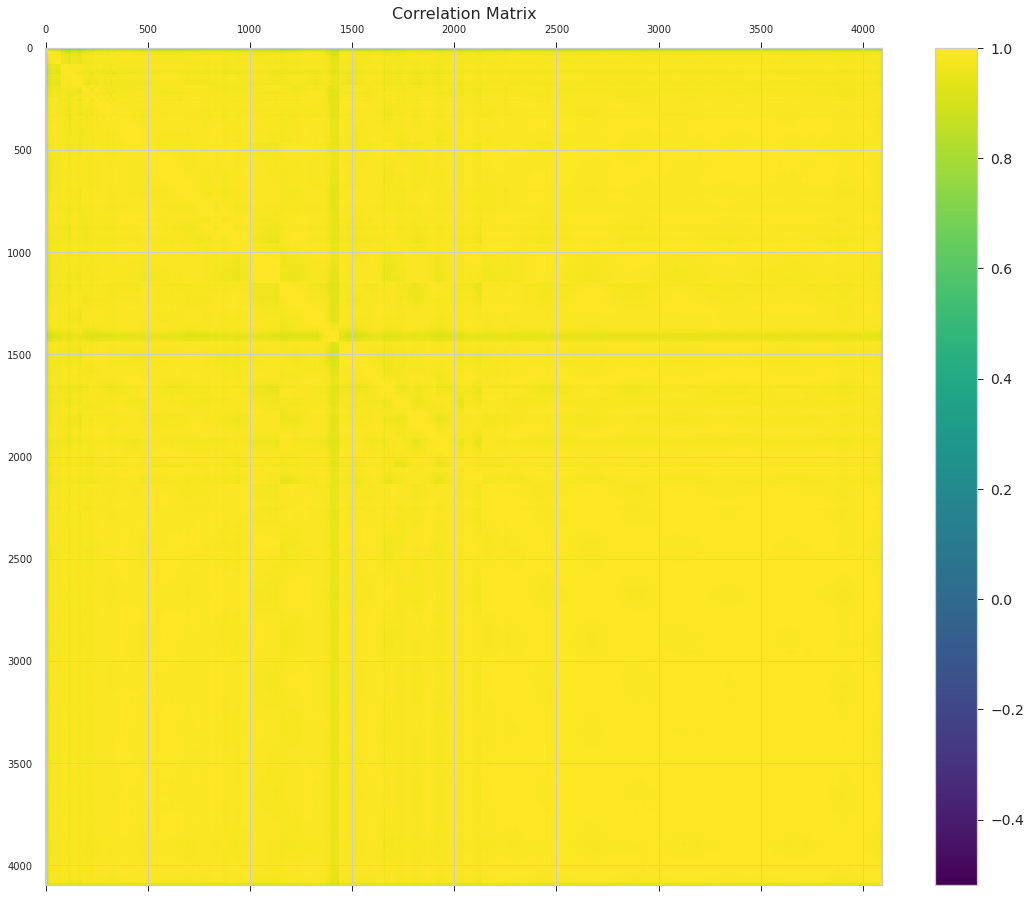

In [10]:
df=rd_rd
f = plt.figure(figsize=(19, 15))
corrMatrix = df.corr("pearson")
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

There is strong correlation between all the data points

In [11]:
labels = (metadf["temblor"] == 'si').astype('int8')
#labels = (metadf["level"]).astype('int8')
labels.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

X_train=rd_rd
y_train=labels.values

In [13]:
# Reduce dimension with LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
X_train_lda=lda.transform(X_train)

In [14]:
df_lda=pd.DataFrame(X_train_lda, columns=["component1"])#temblor
#df_lda=pd.DataFrame(X_train_lda, columns=["component1", "component2"])#level
df_lda["labels"]=y_train.T
df_lda.head()

,component1,labels
0,-0.125569,0
1,1.421766,0
2,-2.230315,0
3,-0.334537,0
4,-0.608911,0


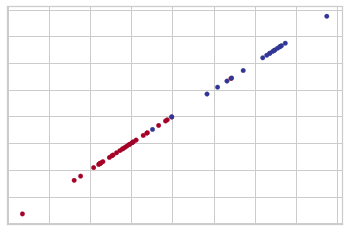

In [15]:
ax = df_lda.plot.scatter(x="component1", y="component1", c="labels", cmap="RdYlBu", colorbar=False)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])

In [16]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))
# Fit the method's model
pca.fit(X_train, y_train)
X_train_pca=pca.transform(X_train)

In [17]:
df_pca=pd.DataFrame(X_train_pca, columns=["PCA0", "PCA1","PCA2"])
df_pca["labels"]=y_train.T
df_pca.head()

,PCA0,PCA1,PCA2,labels
0,-63.925871,-0.006942,0.032608,0
1,-61.465363,0.472232,0.138988,0
2,-57.812550,0.342200,0.118356,0
3,-58.237942,-0.256787,0.782946,0
4,-60.420189,0.082563,0.275475,0


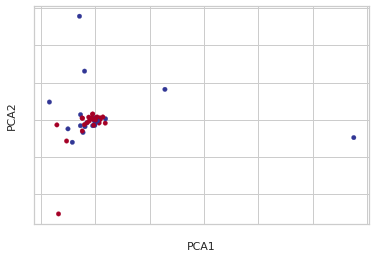

In [18]:
ax = df_pca.plot.scatter(x="PCA1", y="PCA2", c="labels", cmap="RdYlBu", colorbar=False)
ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])

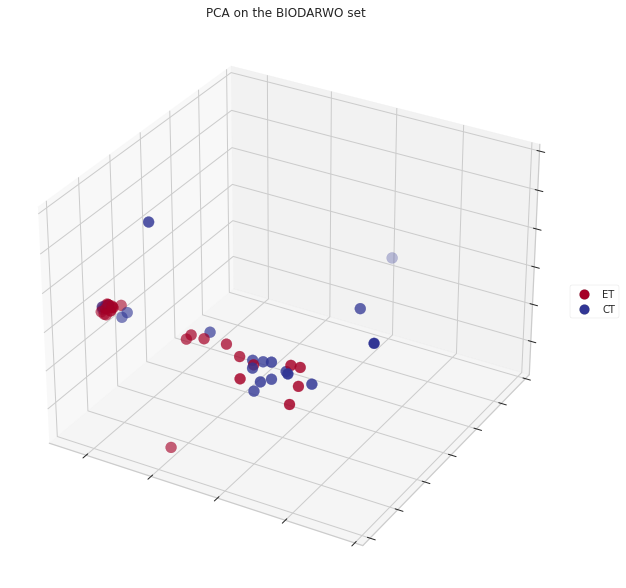

In [19]:
# Plot initialisation
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')


sc=ax.scatter(df_pca['PCA0'], 
              df_pca['PCA1'], 
              df_pca['PCA2'], c=df_pca.labels, cmap="RdYlBu", s=120)
    
# label the axes
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_zlabel(None)
ax.set_title("PCA on the BIODARWO set")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

colors = [sc.cmap(sc.norm(i)) for i in [0.0, 1.0, 2.0]]

custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]
import collections
legend = ['ET','CT']#temblor
ax.legend(custom_lines, legend, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [20]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


score='accuracy'
X = X_train
y = y_train

loo = LeaveOneOut()

In [50]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size=0.25, random_state=38)
Counter(ys_train), Counter(ys_test)

(Counter({1: 15, 0: 24}), Counter({0: 8, 1: 6}))

$$ Accuracy: \frac{TP + TN}{TP + TN + FP + FN} $$ 

$$    Recall: \frac{TP}{TP + FN} $$

$$    Precision: \frac{TP}{TP + FP} $$

$$    Specifity: \frac{TN}{TN + FP} $$

Where TP, TN, FP, and FN are, respectively, the true positive, true negative, false positive and false negative values
of the confusion matrix. The positive case corresponds to the ET subjects while the negative case to the CT ones.

**Equations explained**

* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”. From the whole positive cases how many of them where properly detected.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in. 

The cheating is resolved by looking at both relevant metrics instead of just one. E.g. the cheating 100% sensitivity that always says “positive” has 0% specificity.


In [21]:
# predictive model
clf = SVC(kernel='rbf', gamma=0.2, C=10**3)

In [22]:
cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("CV train score svm: {}".format(cv['train_score'].mean()))
print("CV test score svm: {}".format(cv['test_score'].mean()))

CV train score svm: 1.0
CV test score svm: 0.6037735849056604


In [23]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 1.0
Holdout test score svm: 0.5


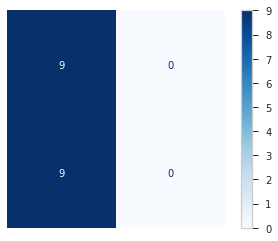

In [24]:
predictions = clf.predict(Xs_test)
#cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
#disp.plot(cmap=plt.cm.Blues)
#_=plt.axis('off')

In [25]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.50      1.00      0.67         9
          CT       0.00      0.00      0.00         9

    accuracy                           0.50        18
   macro avg       0.25      0.50      0.33        18
weighted avg       0.25      0.50      0.33        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

In [26]:
# RandomForest
clf = RandomForestClassifier(n_estimators=10)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("CV train score RandomForest: {}".format(cv['train_score'].mean()))
print("CV test score RandomForest: {}".format(cv['test_score'].mean()))

CV train score RandomForest: 0.9738751814223512
CV test score RandomForest: 0.7547169811320755


In [27]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 0.9428571428571428
Holdout test score svm: 0.5


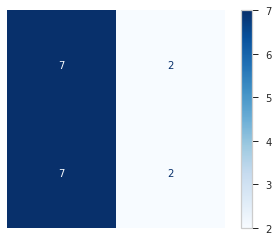

In [28]:
predictions = clf.predict(Xs_test)
cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [29]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.50      0.78      0.61         9
          CT       0.50      0.22      0.31         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.46        18
weighted avg       0.50      0.50      0.46        18



In [30]:
# Knn
clf = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', metric='euclidean')

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("CV train score knn: {}".format(cv['train_score'].mean()))
print("CV test score knn: {}".format(cv['test_score'].mean()))

CV train score knn: 0.79100145137881
CV test score knn: 0.6981132075471698


In [31]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 0.6857142857142857
Holdout test score svm: 0.5


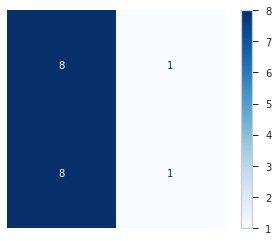

In [32]:
predictions = clf.predict(Xs_test)
cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [33]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.50      0.89      0.64         9
          CT       0.50      0.11      0.18         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.41        18
weighted avg       0.50      0.50      0.41        18



In [34]:
# predictive model
clf = LDA()

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("CV train score LDA: {}".format(cv['train_score'].mean()))
print("CV test score LDA: {}".format(cv['test_score'].mean()))

CV train score LDA: 0.9238026124818576
CV test score LDA: 0.4528301886792453


In [35]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 0.8857142857142857
Holdout test score svm: 0.5


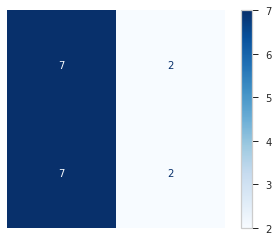

In [36]:
predictions = clf.predict(Xs_test)
cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [37]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.50      0.78      0.61         9
          CT       0.50      0.22      0.31         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.46        18
weighted avg       0.50      0.50      0.46        18

